# 얼굴 인식 등의 이미지 관련 API 사용

#### 참고자료
* Naver 개발자 센터 검색
    * https://developers.naver.com/main/
    * https://developers.naver.com/docs/clova/api
* 각 검색 분야별 사용하는 URL
    * https://developers.naver.com/docs/search/blog/
    * 블로그 : https://openapi.naver.com/v1/search/blog.json
    * 뉴스 : https://openapi.naver.com/v1/search/news.json
    * 책 : https://openapi.naver.com/v1/search/book.json
* 닮은 유명인을 찾는 url
    * https://developers.naver.com/docs/clova/api/CFR/API_Guide.md
* ROI(Region Of Interest)-각도위치(관심영역)

## 1. 네이버 얼굴인식 기능

#### 초기설정
* Naver 개발자 센터 검색
	* https://developers.naver.com/main/
* 로그인하고 들어가기
* 서비스 API 아이콘 클릭 --> 데이터랩 --> 오픈 API 이용 신청  --> 계정설정 (휴대폰 인증) <br>
	--> 애플리케이션 이름(it_study)<br>
	--> 사용API --> 검색 (*)<br>
		데이터랩(검색어트렌드) <br>
		데이터랩(쇼핑인사이트) <br>
		Clova Face Recognition(*)<br>
	--> 환경추가-> web -->URL:  http://localhost -> 등록하기<br>
* client_id = "ztxaEBDa7ooscTczx5Py"
* client_secret = "xnJru4nP4Z"

In [1]:
#https://developers.naver.com/docs/clova/api
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

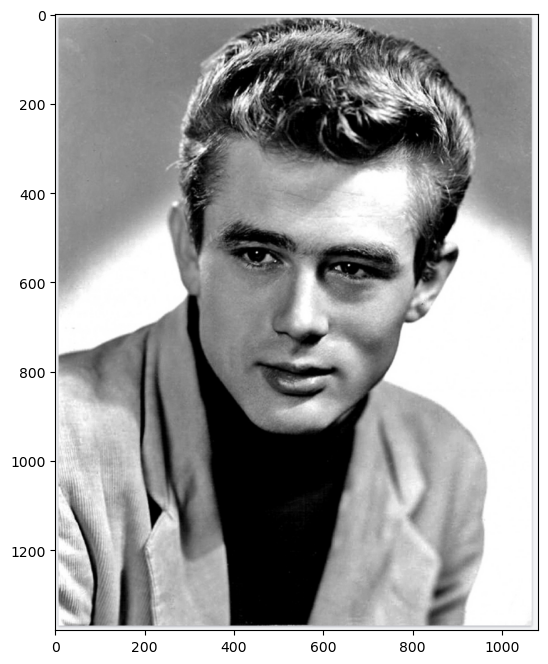

In [2]:
img = mpimg.imread('../data/img/face_test_01.jpg')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [4]:
import requests

client_id = "ztxaEBDa7ooscTczx5Py"
client_secret = "xnJru4nP4Z"

url = "https://openapi.naver.com/v1/vision/celebrity"       # naver api 
files = {'image': open('../data/img/face_test_01.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url,  files=files, headers=headers)

In [5]:
#JSON은 Java Script Object Notation의 약자로 
#웹서버와 클라이언트 간의 데이터 교환에 많이 사용
#json은 dict와 유사한 구조-> API를 사용한 결과 json 데이터 형태로 출력

import json

parsed = json.loads(response.text)      # json 파일로 온 response의 text를 parsed에 넣는다
print(json.dumps(parsed, indent=4, sort_keys=False, 
                 ensure_ascii=False))

#네이버 유명인 인식 api 적용 결과

{
    "info": {
        "size": {
            "width": 1082,
            "height": 1380
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "이병헌",
                "confidence": 0.27717
            }
        }
    ]
}


In [7]:
#얼굴 감지 API
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('../data/img/face_test_01.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url, files=files, headers=headers)

parsed = json.loads(response.text)

#ensure_ascii=False : utf-8로 인코딩된 한글을 제대로 표시해 줌
print(json.dumps(parsed, indent=4, sort_keys=False, 
                 ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 1082,
            "height": 1380
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 330,
                "y": 452,
                "width": 454,
                "height": 454
            },
            "landmark": {
                "leftEye": {
                    "x": 449,
                    "y": 534
                },
                "rightEye": {
                    "x": 666,
                    "y": 569
                },
                "nose": {
                    "x": 538,
                    "y": 694
                },
                "leftMouth": {
                    "x": 448,
                    "y": 783
                },
                "rightMouth": {
                    "x": 634,
                    "y": 801
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.999998
            },
         

## 2. 인식된 얼굴 사진에 정보를 표시

In [8]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('../data/img/face_test_01.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url, files=files, headers=headers)

detect_result = json.loads(response.text)

In [9]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [10]:
detect_result['faces']

[{'roi': {'x': 330, 'y': 452, 'width': 454, 'height': 454},
  'landmark': {'leftEye': {'x': 449, 'y': 534},
   'rightEye': {'x': 666, 'y': 569},
   'nose': {'x': 538, 'y': 694},
   'leftMouth': {'x': 448, 'y': 783},
   'rightMouth': {'x': 634, 'y': 801}},
  'gender': {'value': 'male', 'confidence': 0.999998},
  'age': {'value': '26~30', 'confidence': 0.17512},
  'emotion': {'value': 'neutral', 'confidence': 0.999991},
  'pose': {'value': 'frontal_face', 'confidence': 0.997845}}]

In [11]:
detect_result['faces'][0]

{'roi': {'x': 330, 'y': 452, 'width': 454, 'height': 454},
 'landmark': {'leftEye': {'x': 449, 'y': 534},
  'rightEye': {'x': 666, 'y': 569},
  'nose': {'x': 538, 'y': 694},
  'leftMouth': {'x': 448, 'y': 783},
  'rightMouth': {'x': 634, 'y': 801}},
 'gender': {'value': 'male', 'confidence': 0.999998},
 'age': {'value': '26~30', 'confidence': 0.17512},
 'emotion': {'value': 'neutral', 'confidence': 0.999991},
 'pose': {'value': 'frontal_face', 'confidence': 0.997845}}

In [12]:
#각도의 위치(region of interest) -x,y좌표, 높이, 넓이
detect_result['faces'][0]['roi']

{'x': 330, 'y': 452, 'width': 454, 'height': 454}

In [13]:
detect_result['faces'][0]['gender']

{'value': 'male', 'confidence': 0.999998}

In [14]:
detect_result['faces'][0]['age']

{'value': '26~30', 'confidence': 0.17512}

In [15]:
detect_result['faces'][0]['emotion']

{'value': 'neutral', 'confidence': 0.999991}

In [16]:
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = \
detect_result['faces'][0]['gender'].values()

emotion, emotion_confidence = \
detect_result['faces'][0]['emotion'].values()

age, age_confidence = detect_result['faces'][0]['age'].values()

In [17]:
annotation = gender + ' : ' + str(gen_confidence) + \
                '\n' + emotion + ' : ' + str(emotion_confidence) + \
                '\n' + age + ' : ' + str(age_confidence)

print(annotation)

male : 0.999998
neutral : 0.999991
26~30 : 0.17512


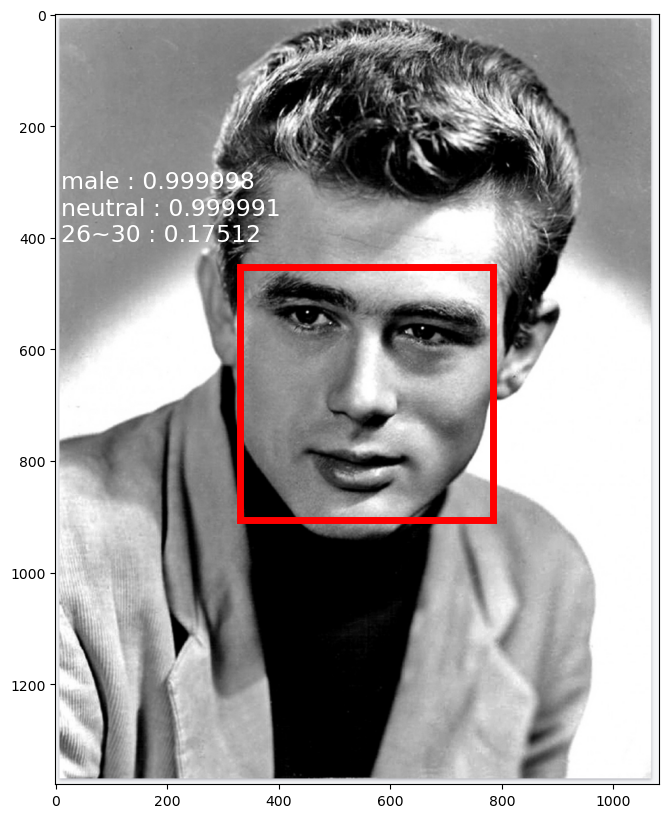

In [19]:
#patches : 사진에 도형을 그릴 수 있게 도와주는 모듈
import matplotlib.patches as patches
img = mpimg.imread('../data/img/face_test_01.jpg')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y),w,h,
                              linewidth=5,
                              edgecolor='r',
                              facecolor='none')
ax.add_patch(rect_face)

plt.text(10, 400 , annotation, wrap=True, 
         fontsize=17, color='white')
plt.show()

## 3. 여러 얼굴이 있는 사진에 대한 정보를 표시해보자

In [21]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('../data/img/face_test_02.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url, files=files, headers=headers)

detect_result = json.loads(response.text)

In [22]:
detect_result

{'info': {'size': {'width': 1868, 'height': 1252}, 'faceCount': 3},
 'faces': [{'roi': {'x': 833, 'y': 453, 'width': 208, 'height': 208},
   'landmark': {'leftEye': {'x': 889, 'y': 517},
    'rightEye': {'x': 977, 'y': 513},
    'nose': {'x': 928, 'y': 551},
    'leftMouth': {'x': 892, 'y': 602},
    'rightMouth': {'x': 975, 'y': 600}},
   'gender': {'value': 'child', 'confidence': 0.999999},
   'age': {'value': '0~2', 'confidence': 1.0},
   'emotion': {'value': 'laugh', 'confidence': 0.996333},
   'pose': {'value': 'frontal_face', 'confidence': 0.999809}},
  {'roi': {'x': 1098, 'y': 340, 'width': 250, 'height': 250},
   'landmark': None,
   'gender': {'value': 'female', 'confidence': 0.998219},
   'age': {'value': '21~25', 'confidence': 0.272703},
   'emotion': {'value': 'sad', 'confidence': 0.709131},
   'pose': {'value': 'left_face', 'confidence': 0.9162}},
  {'roi': {'x': 410, 'y': 373, 'width': 267, 'height': 267},
   'landmark': None,
   'gender': {'value': 'female', 'confidence'

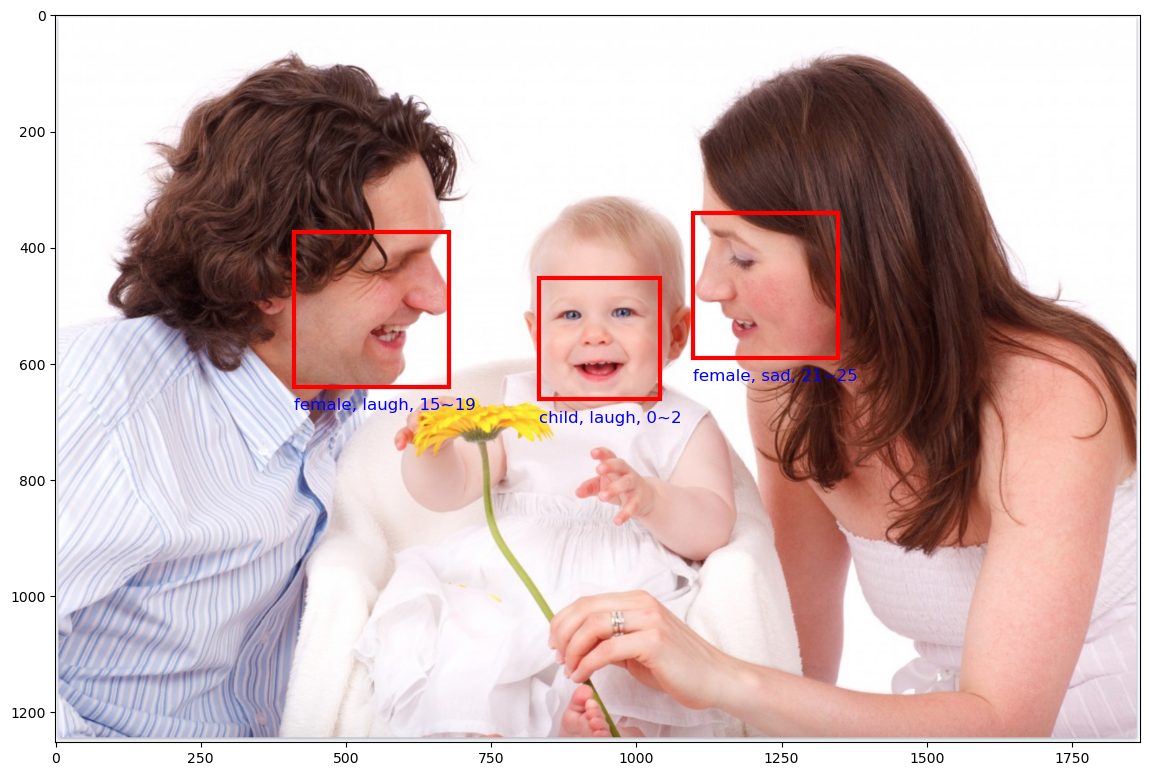

In [25]:
img = mpimg.imread('../data/img/face_test_02.jpg')
fig,ax = plt.subplots(figsize=(14,10))
ax.imshow(img)

for each in detect_result['faces']:
    x, y, w, h = each['roi'].values()
    gender, gen_confidence = each['gender'].values()
    emotion, emotion_confidence = each['emotion'].values()
    age, age_confidence = each['age'].values()
    
    rect_face = patches.Rectangle((x,y),w,h, linewidth=3, 
                                  edgecolor='r', facecolor='none')
    
    ant_letter = gender + ', ' + emotion +', ' +  age
    plt.text(x, y+h+40, ant_letter, size=12, color='blue')
    ax.add_patch(rect_face)

plt.show()

## 4. 여러 얼굴이 있는 사진에 대한 정보를 표시해보자(내 사진)

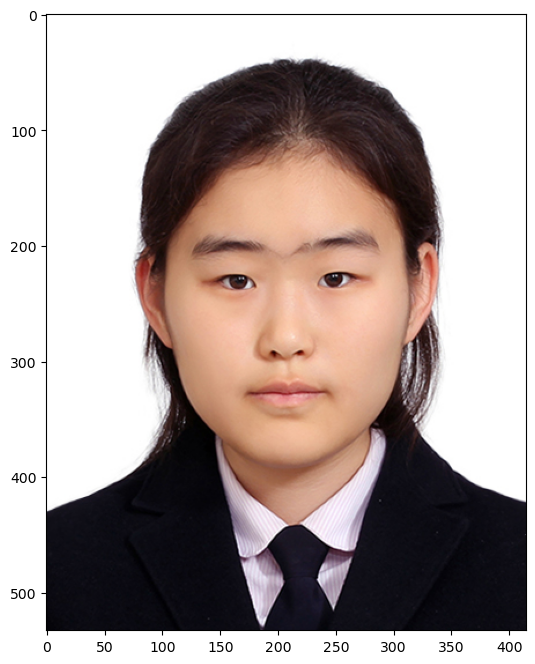

In [54]:
img = mpimg.imread('../data/img/수능사진.jpg')

plt.figure(figsize=(10,8))
plt.imshow(img)
plt.show()

In [55]:
import requests

client_id = "ztxaEBDa7ooscTczx5Py"
client_secret = "xnJru4nP4Z"

url = "https://openapi.naver.com/v1/vision/celebrity"       # naver api 
files = {'image': open('../data/img/수능사진.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url,  files=files, headers=headers)

In [56]:
#JSON은 Java Script Object Notation의 약자로 
#웹서버와 클라이언트 간의 데이터 교환에 많이 사용
#json은 dict와 유사한 구조-> API를 사용한 결과 json 데이터 형태로 출력

import json

parsed = json.loads(response.text)      # json 파일로 온 response의 text를 parsed에 넣는다
print(json.dumps(parsed, indent=4, sort_keys=False, 
                 ensure_ascii=False))

#네이버 유명인 인식 api 적용 결과

{
    "info": {
        "size": {
            "width": 415,
            "height": 533
        },
        "faceCount": 1
    },
    "faces": [
        {
            "celebrity": {
                "value": "양한열",
                "confidence": 0.585334
            }
        }
    ]
}


In [58]:
#얼굴 감지 API
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('../data/img/수능사진.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url, files=files, headers=headers)

parsed = json.loads(response.text)

#ensure_ascii=False : utf-8로 인코딩된 한글을 제대로 표시해 줌
print(json.dumps(parsed, indent=4, sort_keys=False, 
                 ensure_ascii=False))

{
    "info": {
        "size": {
            "width": 415,
            "height": 533
        },
        "faceCount": 1
    },
    "faces": [
        {
            "roi": {
                "x": 115,
                "y": 184,
                "width": 194,
                "height": 194
            },
            "landmark": {
                "leftEye": {
                    "x": 164,
                    "y": 229
                },
                "rightEye": {
                    "x": 248,
                    "y": 228
                },
                "nose": {
                    "x": 207,
                    "y": 281
                },
                "leftMouth": {
                    "x": 171,
                    "y": 327
                },
                "rightMouth": {
                    "x": 245,
                    "y": 325
                }
            },
            "gender": {
                "value": "male",
                "confidence": 0.886919
            },
           

In [59]:
url = "https://openapi.naver.com/v1/vision/face"
files = {'image': open('../data/img/수능사진.jpg', 'rb')}
headers = {'X-Naver-Client-Id': client_id, 
           'X-Naver-Client-Secret': client_secret }

response = requests.post(url, files=files, headers=headers)

detect_result = json.loads(response.text)

In [60]:
detect_result.keys()

dict_keys(['info', 'faces'])

In [61]:
detect_result['faces']

[{'roi': {'x': 115, 'y': 184, 'width': 194, 'height': 194},
  'landmark': {'leftEye': {'x': 164, 'y': 229},
   'rightEye': {'x': 248, 'y': 228},
   'nose': {'x': 207, 'y': 281},
   'leftMouth': {'x': 171, 'y': 327},
   'rightMouth': {'x': 245, 'y': 325}},
  'gender': {'value': 'male', 'confidence': 0.886919},
  'age': {'value': '13~17', 'confidence': 0.937659},
  'emotion': {'value': 'neutral', 'confidence': 0.999983},
  'pose': {'value': 'frontal_face', 'confidence': 0.999777}}]

In [62]:
detect_result['faces'][0]

{'roi': {'x': 115, 'y': 184, 'width': 194, 'height': 194},
 'landmark': {'leftEye': {'x': 164, 'y': 229},
  'rightEye': {'x': 248, 'y': 228},
  'nose': {'x': 207, 'y': 281},
  'leftMouth': {'x': 171, 'y': 327},
  'rightMouth': {'x': 245, 'y': 325}},
 'gender': {'value': 'male', 'confidence': 0.886919},
 'age': {'value': '13~17', 'confidence': 0.937659},
 'emotion': {'value': 'neutral', 'confidence': 0.999983},
 'pose': {'value': 'frontal_face', 'confidence': 0.999777}}

In [63]:
x, y, w, h = detect_result['faces'][0]['roi'].values()
gender, gen_confidence = \
detect_result['faces'][0]['gender'].values()

emotion, emotion_confidence = \
detect_result['faces'][0]['emotion'].values()

age, age_confidence = detect_result['faces'][0]['age'].values()

In [64]:
annotation = gender + ' : ' + str(gen_confidence) + \
                '\n' + emotion + ' : ' + str(emotion_confidence) + \
                '\n' + age + ' : ' + str(age_confidence)

print(annotation)

male : 0.886919
neutral : 0.999983
13~17 : 0.937659


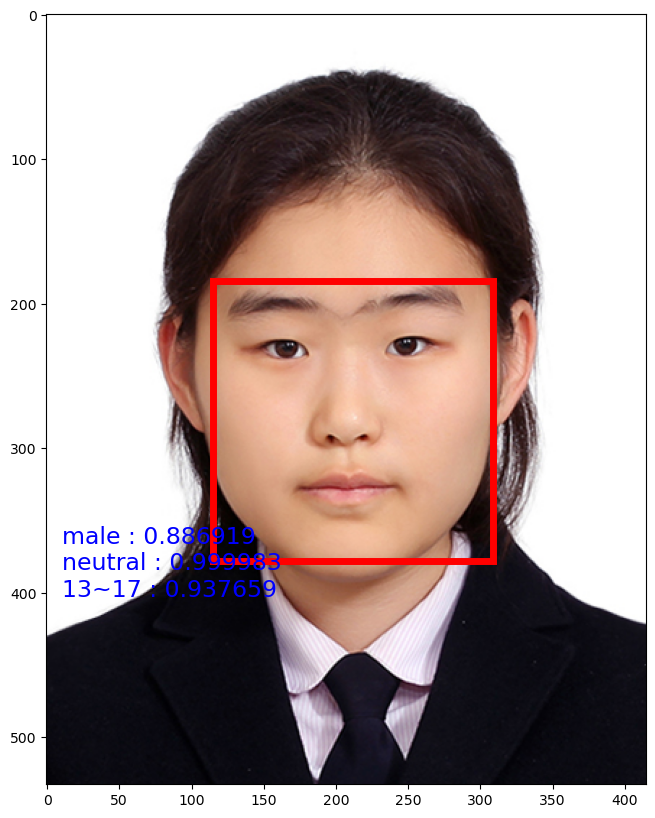

In [65]:
#patches : 사진에 도형을 그릴 수 있게 도와주는 모듈
import matplotlib.patches as patches
img = mpimg.imread('../data/img/수능사진.jpg')

fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(img)
rect_face = patches.Rectangle((x,y),w,h,
                              linewidth=5,
                              edgecolor='r',
                              facecolor='none')
ax.add_patch(rect_face)

plt.text(10, 400 , annotation, wrap=True, 
         fontsize=17, color='blue')
plt.show()